In [1]:
import pandas as pd
import pandas as pd
import googletrans
import seaborn as sea
from googletrans import Translator
from googletrans import LANGUAGES

In [2]:
train_emo = pd.read_csv("C:/Users/levent/Downloads/Text_dataset/train_sent_emo.csv")
test_emo = pd.read_csv("C:/Users/levent/Downloads/Text_dataset/test_sent_emo.csv")
dev_emo = pd.read_csv("C:/Users/levent/Downloads/Text_dataset/dev_sent_emo.csv")

test_csv = pd.read_csv("C:/Users/levent/Downloads/Text_dataset/Emotion_dataset_test.csv")
train_csv = pd.read_csv("C:/Users/levent/Downloads/Text_dataset/Emotion_dataset_train.csv")

In [3]:
only_neutral_data=pd.read_csv("C:/Users/levent/tr_only_csv")

In [4]:
only_neutral_data

,batch,labels
0,Ayrıca şirketimin KL-5'ten GR-6 sistemine geçi...,neutral
1,Eliniz çok dolu olmalı.,neutral
2,Bunu yaptım. Bunu yaptım.,neutral
3,Peki biraz da görevlerinizden bahsedelim.,neutral
4,"Şimdi bir bölümün başında olacaksın, dolayısıy...",neutral
...,...,...
4705,"Tut, tut.",neutral
4706,Bu konuda Chandler'ın tarafını tutuyorum.,neutral
4707,Sen mi ben mi?,neutral
4708,"Anladım. Joey, kadınların Adem elması yoktur.",neutral


In [5]:
only_neutral_halfdata = only_neutral_data.iloc[:len(only_neutral_data)//5] 

In [6]:
only_neutral_halfdata

,batch,labels
0,Ayrıca şirketimin KL-5'ten GR-6 sistemine geçi...,neutral
1,Eliniz çok dolu olmalı.,neutral
2,Bunu yaptım. Bunu yaptım.,neutral
3,Peki biraz da görevlerinizden bahsedelim.,neutral
4,"Şimdi bir bölümün başında olacaksın, dolayısıy...",neutral
...,...,...
937,Ben de merak ediyordum....,neutral
938,Yani şef misin?,neutral
939,"Monica, menümün arkasında seninle konuşabilir ...",neutral
940,Ben de sohbet ediyordum.,neutral


In [7]:
tr_train_data=pd.DataFrame()
tr_train_data['batch']=train_csv['Sentence']
tr_train_data['labels']=train_csv['Label']


In [8]:
tr_test_data=pd.DataFrame()
tr_test_data['batch']=test_csv['Sentence']
tr_test_data['labels']=test_csv['label']

<Axes: xlabel='count', ylabel='labels'>

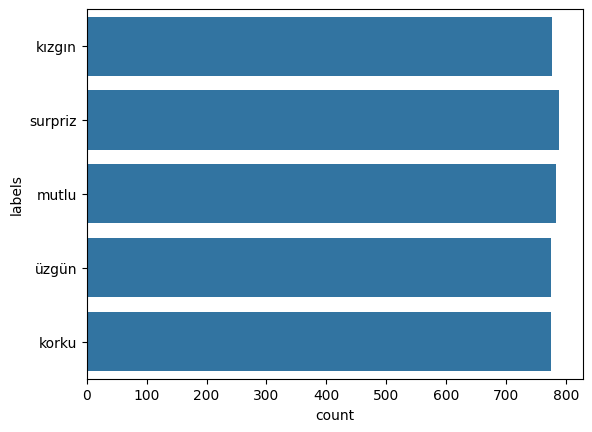

In [9]:
sea.countplot(tr_train_data['labels'])

In [10]:
tr_train_data

,batch,labels
0,Allah aşkına bi fırça neden 250 tl neden yani ...,kızgın
1,Muavin bir şey içip içmediğimi sormak için ben...,surpriz
2,Herkese güzel günler öpüyorum sizler tivitır a...,mutlu
3,Ya şu sevgililerin birbirine şifre verme olayı...,kızgın
4,Almanya'da 'yok artık' dedirten olay! Nereye p...,surpriz
...,...,...
3895,Onu görünce ben de ürktüm bir başta sonra yeni...,korku
3896,Gece sabaha kadar 50 tane kabus gördüm nasıl b...,korku
3897,"Sustum senden sonra, sessize aldım dilimi. Ne ...",korku
3898,mutsuzum çünkü ders çalışamıyorum odaklanamıyo...,üzgün


In [11]:
All_data = pd.concat([tr_train_data,tr_test_data, only_neutral_halfdata], ignore_index=True)

<Axes: xlabel='count', ylabel='labels'>

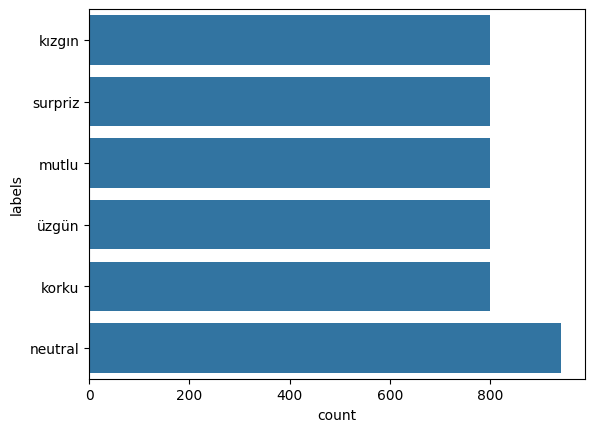

In [12]:
sea.countplot(All_data['labels'])

In [13]:
Filtered_data = All_data[~All_data['labels'].isin(['korku'])]

<Axes: xlabel='count', ylabel='labels'>

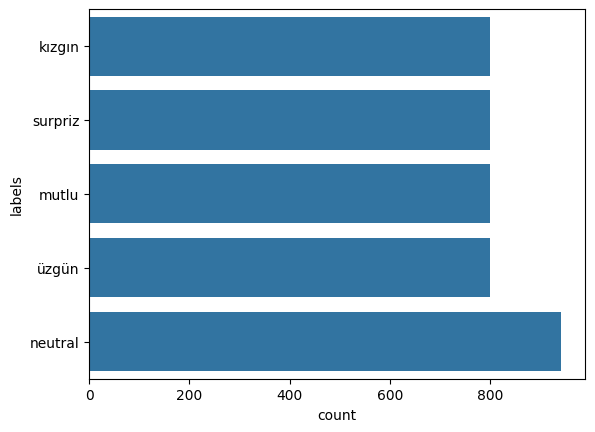

In [14]:
sea.countplot(Filtered_data['labels'])

In [15]:
labels_list = {
    'kızgın': 'angry',
    'mutlu': 'happy',
    'neutral': 'neutral',
    'üzgün': 'sad',
    'surpriz': 'surprised'
}

In [16]:
def list_text_features(label,list):
    if label in list: 
        emotion = list.get(label)
    return emotion

In [17]:
remastered_labels = [list_text_features(path,labels_list) for path in Filtered_data['labels']]

In [18]:
remastered_labels

['angry',
 'surprised',
 'happy',
 'angry',
 'surprised',
 'angry',
 'angry',
 'angry',
 'surprised',
 'sad',
 'sad',
 'happy',
 'sad',
 'happy',
 'sad',
 'angry',
 'angry',
 'sad',
 'happy',
 'surprised',
 'surprised',
 'sad',
 'surprised',
 'happy',
 'sad',
 'angry',
 'surprised',
 'sad',
 'happy',
 'surprised',
 'happy',
 'surprised',
 'surprised',
 'surprised',
 'angry',
 'happy',
 'happy',
 'angry',
 'angry',
 'angry',
 'surprised',
 'happy',
 'sad',
 'happy',
 'surprised',
 'angry',
 'happy',
 'surprised',
 'surprised',
 'sad',
 'surprised',
 'happy',
 'sad',
 'sad',
 'happy',
 'happy',
 'angry',
 'sad',
 'happy',
 'angry',
 'angry',
 'sad',
 'angry',
 'surprised',
 'surprised',
 'angry',
 'surprised',
 'sad',
 'surprised',
 'sad',
 'sad',
 'sad',
 'sad',
 'happy',
 'angry',
 'happy',
 'surprised',
 'sad',
 'happy',
 'sad',
 'happy',
 'angry',
 'angry',
 'surprised',
 'sad',
 'sad',
 'surprised',
 'happy',
 'angry',
 'sad',
 'sad',
 'happy',
 'sad',
 'surprised',
 'happy',
 'angr

In [19]:
Filtered_data['batch']

0       Allah aşkına bi fırça neden 250 tl neden yani ...
1       Muavin bir şey içip içmediğimi sormak için ben...
2       Herkese güzel günler öpüyorum sizler tivitır a...
3       Ya şu sevgililerin birbirine şifre verme olayı...
4       Almanya'da 'yok artık' dedirten olay! Nereye p...
                              ...                        
4937                           Ben de merak ediyordum....
4938                                      Yani şef misin?
4939    Monica, menümün arkasında seninle konuşabilir ...
4940                             Ben de sohbet ediyordum.
4941                      Harika olurdu. Teşekkür ederim.
Name: batch, Length: 4142, dtype: object

In [20]:
Filtered_data

,batch,labels
0,Allah aşkına bi fırça neden 250 tl neden yani ...,kızgın
1,Muavin bir şey içip içmediğimi sormak için ben...,surpriz
2,Herkese güzel günler öpüyorum sizler tivitır a...,mutlu
3,Ya şu sevgililerin birbirine şifre verme olayı...,kızgın
4,Almanya'da 'yok artık' dedirten olay! Nereye p...,surpriz
...,...,...
4937,Ben de merak ediyordum....,neutral
4938,Yani şef misin?,neutral
4939,"Monica, menümün arkasında seninle konuşabilir ...",neutral
4940,Ben de sohbet ediyordum.,neutral


In [21]:
Last_data=pd.DataFrame()
Last_data['batch']=Filtered_data['batch']
Last_data['labels']=remastered_labels


In [22]:
Last_data

,batch,labels
0,Allah aşkına bi fırça neden 250 tl neden yani ...,angry
1,Muavin bir şey içip içmediğimi sormak için ben...,surprised
2,Herkese güzel günler öpüyorum sizler tivitır a...,happy
3,Ya şu sevgililerin birbirine şifre verme olayı...,angry
4,Almanya'da 'yok artık' dedirten olay! Nereye p...,surprised
...,...,...
4937,Ben de merak ediyordum....,neutral
4938,Yani şef misin?,neutral
4939,"Monica, menümün arkasında seninle konuşabilir ...",neutral
4940,Ben de sohbet ediyordum.,neutral


In [23]:
# metinler küçük harflere dönüştürüldü 
Last_data['batch']=Last_data['batch'].str.lower()

<Axes: xlabel='count', ylabel='labels'>

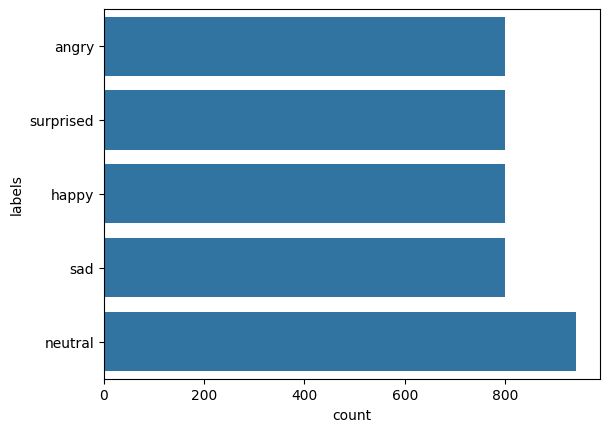

In [24]:
sea.countplot(Last_data['labels'])

In [25]:
#gereksiz boşluklar kaldırıldı

def delete_space(text):
    text = str(text)
    return ' '.join(text.split())

Last_data['batch'] = Last_data['batch'].apply(delete_space)


In [26]:
Last_data

,batch,labels
0,allah aşkına bi fırça neden 250 tl neden yani ...,angry
1,muavin bir şey içip içmediğimi sormak için ben...,surprised
2,herkese güzel günler öpüyorum sizler tivitır a...,happy
3,ya şu sevgililerin birbirine şifre verme olayı...,angry
4,almanya'da 'yok artık' dedirten olay! nereye p...,surprised
...,...,...
4937,ben de merak ediyordum....,neutral
4938,yani şef misin?,neutral
4939,"monica, menümün arkasında seninle konuşabilir ...",neutral
4940,ben de sohbet ediyordum.,neutral


In [27]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
one_hot_labels = enc.fit_transform(Last_data[['labels']])

In [28]:
import numpy as np

In [29]:
one_hot_labels=one_hot_labels.toarray()

In [30]:
one_hot_labels

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [31]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('turkish'))

In [32]:
stop_words

{'acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'en',
 'eğer',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'ile',
 'ise',
 'için',
 'kez',
 'ki',
 'kim',
 'mu',
 'mü',
 'mı',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niye',
 'niçin',
 'o',
 'sanki',
 'siz',
 'tüm',
 've',
 'veya',
 'ya',
 'yani',
 'çok',
 'çünkü',
 'şey',
 'şu'}

In [33]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\levent\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\levent\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [34]:
from nltk.tokenize import word_tokenize
def remove_stopwords(text):
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    
    return ' '.join(filtered_words)

In [35]:
r_stopwords = Last_data['batch'].apply(remove_stopwords)

In [36]:
r_stopwords

0       allah aşkına bi fırça 250 tl işin sinir bozucu...
1       muavin bir içip içmediğimi sormak beni uykumda...
2       herkese güzel günler öpüyorum sizler tivitır a...
3       sevgililerin birbirine şifre verme olayına sin...
4       almanya'da 'yok artık ' dedirten olay ! park e...
                              ...                        
4937                             ben merak ediyordum ....
4938                                          şef misin ?
4939    monica , menümün arkasında seninle konuşabilir...
4940                               ben sohbet ediyordum .
4941                    harika olurdu . teşekkür ederim .
Name: batch, Length: 4142, dtype: object

In [37]:
from zemberek.morphology import TurkishMorphology

In [38]:
morphology = TurkishMorphology.create_with_defaults()

2025-01-14 19:37:14,000 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 6.910259962081909



In [39]:
#kelimeler token'lerine ayrıldı

def tokanize(text):
    words = text.split()
    stems = []
    for word in words:
        analysis_results = morphology.analyze(word)
        if analysis_results:
            for analysis in analysis_results:
                if hasattr(analysis, "get_stem"):
                    stems.append(analysis.get_stem())
                    break  
    return stems
word_origins=r_stopwords.apply(tokanize)

In [40]:
word_origins

0       [allah, aşk, fırça, 250, tl, iş, sinir, boz, y...
1       [muavin, bir, iç, iç, sor, ben, uyku, uyan, ha...
2                   [herkes, güzel, günle, öp, siz, alem]
3       [sevgili, birbiri, şifre, ver, olay, sinir, ol...
4       [almanya, artık, dedir, olay, !, park, et, unu...
                              ...                        
4937                                     [ben, merak, ed]
4938                                         [şef, mi, ?]
4939    [monica, ,, menü, arka, sen, konuş, mi, lütfen...
4940                                 [ben, sohbet, ed, .]
4941                     [harika, ol, ., teşekkür, ed, .]
Name: batch, Length: 4142, dtype: object

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

processed_texts = [' '.join(tokens) for tokens in word_origins]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(processed_texts)
sequences = tokenizer.texts_to_sequences(processed_texts)

In [42]:
max_sequence_length = 64
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

In [43]:
padded_sequences

array([[  77,   90, 1106, ...,    0,    0,    0],
       [2090,    2,   71, ...,    0,    0,    0],
       [  57,   10,  468, ...,    0,    0,    0],
       ...,
       [ 567, 3926,  389, ...,    0,    0,    0],
       [   3,  569,    6, ...,    0,    0,    0],
       [  48,    1,   63, ...,    0,    0,    0]])

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(padded_sequences, one_hot_labels, test_size=0.3, random_state=42 )

In [45]:
x_train.shape

(2899, 64)

In [46]:
x_test,x_val,y_test,y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42 )

In [47]:
x_test.shape

(621, 64)

In [48]:
vocab_size = len(tokenizer.word_index) + 1 # benzersiz kelime sayısı

In [49]:
vocab_size

3927

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,BatchNormalization,Flatten, MaxPooling1D
from tensorflow.keras.regularizers import l2

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_sequence_length),
    LSTM(128, return_sequences=True, kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.5),
 
    Flatten(), 
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 64, 128)           502656    
                                                                 
 lstm_1 (LSTM)               (None, 64, 128)           131584    
                                                                 
 batch_normalization_1 (Batc  (None, 64, 128)          512       
 hNormalization)                                                 
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 32, 128)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 128)           0         
                                                                 
 flatten_1 (Flatten)         (None, 4096)             

In [63]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=10,  
    batch_size=32
)

Epoch 1/10
91/91 [==============================] - 3s 15ms/step - loss: 1.4000 - accuracy: 0.3898 - val_loss: 1.5222 - val_accuracy: 0.3023
Epoch 2/10
91/91 [==============================] - 1s 11ms/step - loss: 0.3717 - accuracy: 0.8872 - val_loss: 1.2772 - val_accuracy: 0.4936
Epoch 3/10
91/91 [==============================] - 1s 10ms/step - loss: 0.1303 - accuracy: 0.9683 - val_loss: 0.9529 - val_accuracy: 0.7203
Epoch 4/10
91/91 [==============================] - 1s 10ms/step - loss: 0.0665 - accuracy: 0.9845 - val_loss: 0.6214 - val_accuracy: 0.7926
Epoch 5/10
91/91 [==============================] - 1s 10ms/step - loss: 0.0445 - accuracy: 0.9900 - val_loss: 0.2778 - val_accuracy: 0.9228
Epoch 6/10
91/91 [==============================] - 1s 10ms/step - loss: 0.0512 - accuracy: 0.9872 - val_loss: 0.4249 - val_accuracy: 0.8666
Epoch 7/10
91/91 [==============================] - 1s 10ms/step - loss: 0.0551 - accuracy: 0.9865 - val_loss: 0.6224 - val_accuracy: 0.8119
Epoch 8/10
91

In [64]:
model.evaluate(x_test, y_test)

20/20 [==============================] - 0s 8ms/step - loss: 0.4860 - accuracy: 0.9098


[0.4860323965549469, 0.9098228812217712]

In [74]:
model.save("NLP_model90.h5")

In [65]:
def plot_training_history(history):
    
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

In [66]:
import matplotlib.pyplot as plt

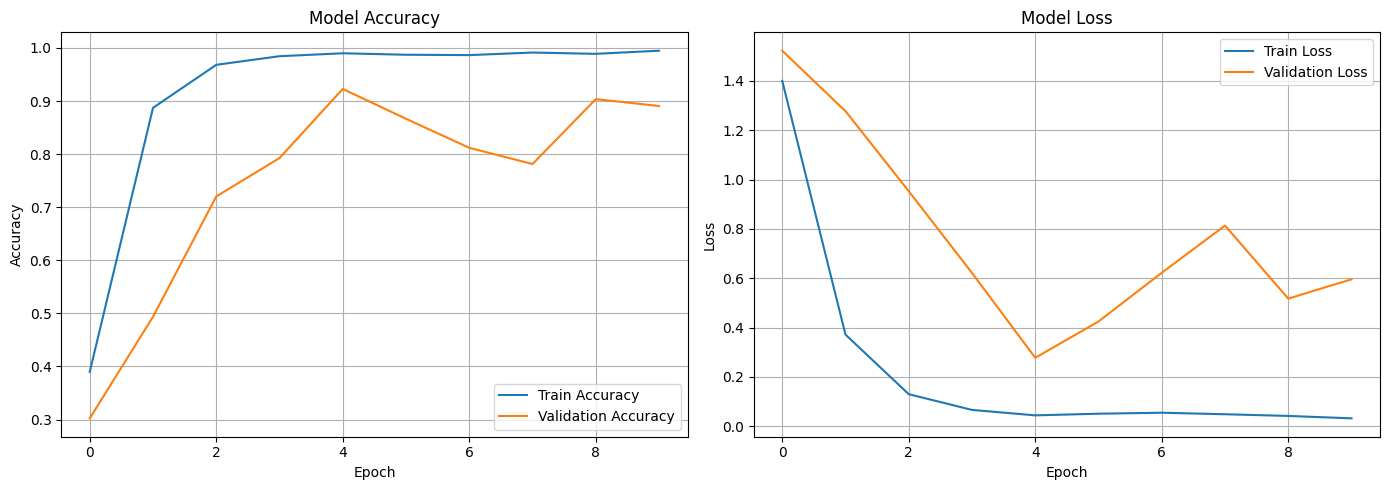

In [67]:
plot_training_history(history)

In [68]:
beklenen_sonuclar = model.predict(x_test)

20/20 [==============================] - 0s 8ms/step


In [69]:
gerçek_sonuçlar = y_test

In [70]:
sonuc_classes = np.argmax(beklenen_sonuclar, axis=1)

In [71]:
y_test

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [72]:
sonuc_classes

array([4, 2, 3, 0, 4, 1, 3, 0, 4, 4, 1, 4, 1, 4, 4, 4, 1, 2, 2, 3, 4, 1,
       4, 2, 2, 4, 3, 2, 0, 2, 1, 3, 3, 1, 3, 1, 1, 4, 1, 0, 1, 3, 1, 4,
       2, 4, 0, 3, 1, 3, 3, 1, 3, 0, 0, 2, 3, 4, 4, 1, 0, 0, 2, 3, 1, 4,
       4, 2, 3, 1, 0, 2, 3, 0, 2, 2, 0, 0, 3, 2, 2, 3, 4, 2, 3, 1, 3, 4,
       0, 2, 0, 3, 2, 3, 4, 2, 1, 4, 1, 2, 2, 3, 2, 3, 1, 1, 2, 0, 0, 1,
       3, 2, 3, 1, 0, 1, 0, 3, 2, 2, 4, 1, 2, 3, 1, 2, 3, 2, 2, 3, 2, 2,
       3, 2, 1, 2, 1, 0, 1, 0, 4, 0, 0, 3, 1, 0, 2, 2, 4, 2, 0, 3, 4, 4,
       1, 3, 2, 0, 2, 4, 2, 4, 1, 2, 0, 4, 2, 3, 0, 3, 3, 1, 0, 2, 1, 2,
       2, 3, 0, 2, 0, 3, 2, 1, 1, 2, 1, 4, 3, 3, 2, 4, 4, 4, 1, 0, 2, 0,
       1, 4, 0, 3, 3, 2, 4, 0, 4, 4, 2, 3, 3, 4, 4, 3, 2, 1, 0, 2, 1, 4,
       3, 2, 2, 1, 1, 3, 1, 2, 2, 2, 1, 1, 4, 0, 3, 2, 2, 2, 2, 2, 0, 0,
       1, 3, 3, 2, 3, 1, 1, 0, 0, 4, 4, 3, 0, 2, 3, 2, 3, 1, 3, 3, 1, 1,
       1, 2, 4, 4, 2, 1, 4, 2, 4, 2, 0, 3, 3, 4, 2, 4, 3, 0, 1, 1, 1, 0,
       3, 0, 4, 4, 2, 0, 0, 2, 4, 1, 4, 1, 3, 3, 3,

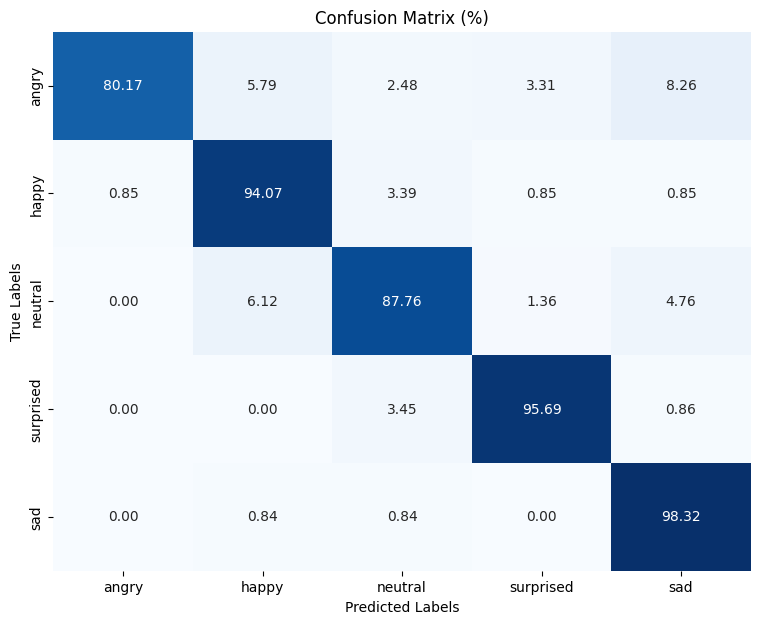

In [73]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns

y_true = np.argmax(gerçek_sonuçlar, axis=1) 
y_pred = sonuc_classes 

cm = confusion_matrix(y_true, y_pred)

class_labels = ['angry','happy','neutral','surprised','sad']
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

cm_percentage = cm_df.div(cm_df.sum(axis=1), axis=0).multiply(100).round(2)

plt.figure(figsize=(9, 7))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (%)")
plt.show()

In [67]:
print("y_true:", y_true[:10])  # İlk 10 gerçek sınıf
print("y_pred:", y_pred[:10]) 

y_true: [4 1 3 0 1 1 3 0 4 4]
y_pred: [4 1 3 0 1 1 3 0 4 4]


In [151]:
test_file="Aman Allahım! Nasıl olur bu?"
test_lower = test_file.lower()

In [152]:
test_lower

'aman allahım! nasıl olur bu?'

In [153]:
without_spase=' '.join(test_lower.split())

In [154]:
without_spase

'aman allahım! nasıl olur bu?'

In [155]:
stop_words

{'acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'en',
 'eğer',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'ile',
 'ise',
 'için',
 'kez',
 'ki',
 'kim',
 'mu',
 'mü',
 'mı',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niye',
 'niçin',
 'o',
 'sanki',
 'siz',
 'tüm',
 've',
 'veya',
 'ya',
 'yani',
 'çok',
 'çünkü',
 'şey',
 'şu'}

In [162]:
words = word_tokenize(without_spase.lower())
filtered_words = [word for word in words if word not in stop_words]
new_text = ' '.join(filtered_words)

In [163]:
new_text

'aman allahım ! olur ?'

In [164]:
def tokanize(text):
    words = text.split()
    stems = []
    for word in words:
        analysis_results = morphology.analyze(word)
        if analysis_results:
            for analysis in analysis_results:
                if hasattr(analysis, "get_stem"):
                    stems.append(analysis.get_stem())
                    break  
    return stems

In [165]:
onli_token = tokanize(new_text)

In [166]:
onli_token

['aman', 'allah', '!', 'olur', '?']

In [168]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

processed_texts = [' '.join(tokens) for tokens in onli_token]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(processed_texts)
sequences = tokenizer.texts_to_sequences(processed_texts)

In [169]:
max_sequence_length = 40
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

In [170]:
padded_sequences

array([[1, 3, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 2, 2, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [6, 2, 7, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [175]:
sonuc = model.predict(padded_sequences)[0]

1/1 [==============================] - 0s 32ms/step


In [176]:
sonuc

array([4.4941530e-04, 7.5453599e-03, 9.8821461e-01, 1.3431215e-03,
       2.4475311e-03], dtype=float32)

In [177]:
sınıf

12